# Sprocket Central Pty Ltd
### Sara Novak
### 18.04.2023


## Load required libraries and datasets

In [1]:
#### Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

In [2]:
#### Load data sets

transactions = pd.read_excel(r'C:\Users\saram\Downloads\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name="Transactions")
print(transactions)
newcustomerlist = pd.read_excel(r'C:\Users\saram\Downloads\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name="NewCustomerList")
print(newcustomerlist)
customerdemographic = pd.read_excel(r'C:\Users\saram\Downloads\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name="CustomerDemographic")
print(customerdemographic)
customeraddress = pd.read_excel(r'C:\Users\saram\Downloads\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name="CustomerAddress")
print(customeraddress)


       transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0   

      order_status         

C:\Users\saram\AppData\Local\Temp\ipykernel_9028\3022873046.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  newcustomerlist = pd.read_excel(r'C:\Users\saram\Downloads\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name="NewCustomerList")


    first_name  last_name  gender  past_3_years_bike_related_purchases  \
0      Chickie    Brister    Male                                   86   
1        Morly     Genery    Male                                   69   
2      Ardelis  Forrester  Female                                   10   
3       Lucine      Stutt  Female                                   64   
4      Melinda     Hadlee  Female                                   34   
..         ...        ...     ...                                  ...   
995  Ferdinand  Romanetti    Male                                   60   
996       Burk    Wortley    Male                                   22   
997   Melloney      Temby  Female                                   17   
998     Dickie    Cubbini    Male                                   30   
999      Sylas    Duffill    Male                                   56   

           DOB                     job_title job_industry_category  \
0   1957-07-12               General Mana

C:\Users\saram\AppData\Local\Temp\ipykernel_9028\3022873046.py:7: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  customerdemographic = pd.read_excel(r'C:\Users\saram\Downloads\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name="CustomerDemographic")


      customer_id      first_name  last_name  gender  \
0               1         Laraine  Medendorp       F   
1               2             Eli    Bockman    Male   
2               3           Arlin     Dearle    Male   
3               4          Talbot        NaN    Male   
4               5  Sheila-kathryn     Calton  Female   
...           ...             ...        ...     ...   
3995         3996         Rosalia   Halgarth  Female   
3996         3997          Blanch     Nisuis  Female   
3997         3998          Sarene    Woolley       U   
3998         3999       Patrizius        NaN    Male   
3999         4000           Kippy    Oldland    Male   

      past_3_years_bike_related_purchases        DOB               job_title  \
0                                      93 1953-10-12     Executive Secretary   
1                                      81 1980-12-16  Administrative Officer   
2                                      61 1954-01-20      Recruiting Manager   
3      

We will work on every data sets seperate fisrt we will see the data type from the tranaction dataset and clean the columns

In [3]:
#### datasets type

transactions.dtypes


transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

We need to change product_first_sold_date change into date format

In [4]:
#### Changing from float to date format
transactions['product_first_sold_date'] = pd.to_datetime(transactions['product_first_sold_date'], origin='1899-12-30', unit='D')
print(transactions)

       transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0   

      order_status         

C:\Users\saram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\tools\datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


We need to check for missing values and if there are values that are repiting

In [5]:
#### Missing values

print("Number of NaN values for the column transaction_id :", transactions['transaction_id'].isnull().sum())
print("Number of NaN values for the column product_id :", transactions['product_id'].isnull().sum())
print("Number of NaN values for the column customer_id :", transactions['customer_id'].isnull().sum())
print("Number of Nan values for the column transaction_date :", transactions['transaction_date'].isnull().sum())
print("Number of Nan values for the column online_order :", transactions['online_order'].isnull().sum())
print("Number of NaN values for the column order_status :", transactions['order_status'].isnull().sum())
print("Number of NaN values for the column brand :", transactions['brand'].isnull().sum())
print("Number of NaN values for the column product_line :", transactions['product_line'].isnull().sum())
print("Number of Nan values for the column product_class :", transactions['product_class'].isnull().sum())
print("Number of Nan values for the column product_size :", transactions['product_size'].isnull().sum())
print("Number of NaN values for the column list_price :", transactions['list_price'].isnull().sum())
print("Number of NaN values for the column standard_cost:", transactions['standard_cost'].isnull().sum())
print("Number of NaN values for the column product_first_sold_date :", transactions['product_first_sold_date'].isnull().sum())

Number of NaN values for the column transaction_id : 0
Number of NaN values for the column product_id : 0
Number of NaN values for the column customer_id : 0
Number of Nan values for the column transaction_date : 0
Number of Nan values for the column online_order : 360
Number of NaN values for the column order_status : 0
Number of NaN values for the column brand : 197
Number of NaN values for the column product_line : 197
Number of Nan values for the column product_class : 197
Number of Nan values for the column product_size : 197
Number of NaN values for the column list_price : 0
Number of NaN values for the column standard_cost: 197
Number of NaN values for the column product_first_sold_date : 197


We can see that we are having missing values, thats way we are going to delite the missing value from the dataframe

In [6]:
#### Drop missing values
transaction1 = transactions.dropna()
transaction1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [8]:
#### check for missing values
print("Number of NaN values for the column transaction_id :", transaction1['transaction_id'].isnull().sum())
print("Number of NaN values for the column product_id :", transaction1['product_id'].isnull().sum())
print("Number of NaN values for the column customer_id :", transaction1['customer_id'].isnull().sum())
print("Number of Nan values for the column transaction_date :", transaction1['transaction_date'].isnull().sum())
print("Number of Nan values for the column online_order :", transaction1['online_order'].isnull().sum())
print("Number of NaN values for the column order_status :", transaction1['order_status'].isnull().sum())
print("Number of NaN values for the column brand :", transaction1['brand'].isnull().sum())
print("Number of NaN values for the column product_line :", transaction1['product_line'].isnull().sum())
print("Number of Nan values for the column product_class :", transaction1['product_class'].isnull().sum())
print("Number of Nan values for the column product_size :", transaction1['product_size'].isnull().sum())
print("Number of NaN values for the column list_price :", transaction1['list_price'].isnull().sum())
print("Number of NaN values for the column standard_cost:", transaction1['standard_cost'].isnull().sum())
print("Number of NaN values for the column product_first_sold_date :", transaction1['product_first_sold_date'].isnull().sum())

Number of NaN values for the column transaction_id : 0
Number of NaN values for the column product_id : 0
Number of NaN values for the column customer_id : 0
Number of Nan values for the column transaction_date : 0
Number of Nan values for the column online_order : 0
Number of NaN values for the column order_status : 0
Number of NaN values for the column brand : 0
Number of NaN values for the column product_line : 0
Number of Nan values for the column product_class : 0
Number of Nan values for the column product_size : 0
Number of NaN values for the column list_price : 0
Number of NaN values for the column standard_cost: 0
Number of NaN values for the column product_first_sold_date : 0


In [7]:
newcustomerlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [8]:
#### print null values
print(newcustomerlist.isnull().sum())

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [9]:
#### Drop only if NaN in secific solumn

newcustomerlist1 = newcustomerlist.dropna(subset=['DOB','job_title','job_industry_category'])

In [10]:
#### print missing values
print(newcustomerlist1.isnull().sum())

first_name                              0
last_name                              20
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                     0
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
Unnamed: 16                             0
Unnamed: 17                             0
Unnamed: 18                             0
Unnamed: 19                             0
Unnamed: 20                             0
Rank                                    0
Value                                   0
dtype: int64


In [11]:
#### define new age column
from datetime import datetime
from datetime import date
def age(DOB):
    today =date.today()
    return today.year - DOB.year - ((today.month, today.day) < (DOB.month, DOB.day))
newcustomerlist1['age'] = newcustomerlist1['DOB'].apply(age)

display(newcustomerlist1)

C:\Users\saram\AppData\Local\Temp\ipykernel_9028\1086280591.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcustomerlist1['age'] = newcustomerlist1['DOB'].apply(age)


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.57,0.7125,0.890625,0.757031,1,1,1.718750,65
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.44,0.4400,0.550000,0.467500,1,1,1.718750,53
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.93,0.9300,0.930000,0.930000,1,1,1.718750,48
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.93,1.1625,1.162500,1.162500,4,4,1.703125,44
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.94,0.9400,1.175000,1.175000,4,4,1.703125,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,Australia,7,0.80,0.8000,0.800000,0.800000,996,996,0.374000,63
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,Australia,10,0.56,0.5600,0.700000,0.595000,997,997,0.357000,21
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,Australia,2,0.46,0.5750,0.575000,0.575000,997,997,0.357000,68
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,Australia,2,1.08,1.3500,1.350000,1.147500,997,997,0.357000,70


In [12]:
customerdemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [13]:
customerdemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [14]:
#### print missing values
print(customerdemographic.isnull().sum())

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64


In [15]:
#### drop missing values from specific columns
customerdemographic1 = customerdemographic.dropna(subset=['DOB','job_title','job_industry_category'])

In [16]:
#### print missing values
print(customerdemographic1.isnull().sum())

customer_id                              0
first_name                               0
last_name                               85
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
default                                155
owns_car                                 0
tenure                                   0
dtype: int64


We do not need the columns deceased_indicator and default we will drop them

In [17]:
#### drop two column
customerdemographic1 = customerdemographic1.drop(columns=['deceased_indicator', 'default'])

In [18]:
customerdemographic1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,Yes,20.0


The column gender has diffrent name, we will change in Female only 

In [19]:
#### count unique values
count = customerdemographic1.gender.unique().size
print("Unique values count : "+ str(count))
print(customerdemographic1.gender.value_counts())

Unique values count : 5
Female    1481
Male      1381
F            1
U            1
Femal        1
Name: gender, dtype: int64


In [20]:
#### replace values
customerdemographic1['gender'].replace({"F":"Female", "Femal":"Female"},inplace=True)

In [21]:
#### count unique values

count = customerdemographic1.gender.unique().size
print("Unique values count : "+ str(count))
print(customerdemographic1.gender.value_counts())

Unique values count : 3
Female    1483
Male      1381
U            1
Name: gender, dtype: int64


Because we do not have age column we will add one

In [22]:
#### define new age column
def age(DOB):
    today =date.today()
    return today.year - DOB.year - ((today.month, today.day) < (DOB.month, DOB.day))
customerdemographic1['age'] = customerdemographic1['DOB'].apply(age)

display(customerdemographic1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,69
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,42
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15.0,69
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,Yes,8.0,50
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,Yes,20.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...
3992,3993,Andi,Dumelow,Female,6,1974-12-05,Librarian,Entertainment,Mass Customer,No,10.0,48
3993,3994,Stephie,Byars,Female,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,No,12.0,34
3994,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,Yes,14.0,47
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,No,19.0,47


In [58]:
customerdemographic1 = customerdemographic1[customerdemographic1['age'] <= 100]


In [59]:
display(customerdemographic1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,69
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,42
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15.0,69
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,Yes,8.0,50
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,Yes,20.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...
3992,3993,Andi,Dumelow,Female,6,1974-12-05,Librarian,Entertainment,Mass Customer,No,10.0,48
3993,3994,Stephie,Byars,Female,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,No,12.0,34
3994,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,Yes,14.0,47
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,No,19.0,47


In [23]:
customeraddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [24]:
#### count unique values
count = customeraddress.state.unique().size
print("Unique values count : "+ str(count))
print(customeraddress.state.value_counts())

Unique values count : 5
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64


In [25]:
#### replace values
customeraddress['state'].replace({"New South Wales":"NSW", "Victoria":"VIC"},inplace=True)

In [26]:
#### count unique values
count = customeraddress.state.unique().size
print("Unique values count : "+ str(count))
print(customeraddress.state.value_counts())

Unique values count : 3
NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64


In [27]:
customeraddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


After cleaning the data sets we will start with data Modeling. We will join the three dataframe, transaction, customeraddress and customerdemoographic based on customer_id in one dataframe transaction. 

In [60]:
# merge transaction1 with customerdemographic based on customer_id
merged = pd.merge(transaction1, customerdemographic1, on="customer_id")

# merge the merged dataframe with customeraddress based on customer_id
final_df = pd.merge(merged, customeraddress, on="customer_id")


final_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,owns_car,tenure,age,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,Yes,10.0,68,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,Yes,10.0,68,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,Yes,10.0,68,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,Yes,10.0,44,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Health,Mass Customer,Yes,10.0,44,4 Shopko Circle,2196,NSW,Australia,5


We need to calculate the Recency, Frequency, and Monetary values for each customer. Then we need to divide each RFM value into four segments, and assign labels from 1 to 4 accordingly. We then concatenate the R, F, and M values together into a single string to create an RFM_score column in the dataframe.

In [61]:
#### calcualte the profit

final_df["profit"] = final_df["list_price"] - final_df["standard_cost"]

final_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,owns_car,tenure,age,address,postcode,state,country,property_valuation,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,Yes,10.0,68,984 Hoepker Court,3064,VIC,Australia,6,17.87
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,Yes,10.0,68,984 Hoepker Court,3064,VIC,Australia,6,448.68
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,Yes,10.0,68,984 Hoepker Court,3064,VIC,Australia,6,179.44
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,Yes,10.0,44,4 Shopko Circle,2196,NSW,Australia,5,1702.55
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Mass Customer,Yes,10.0,44,4 Shopko Circle,2196,NSW,Australia,5,451.65


In [62]:
#### calculate Recency, Frequency, and Monetary values
today = pd.to_datetime("2017-12-30")
recency_df = final_df.groupby("customer_id")["transaction_date"].max().reset_index()
recency_df["recency"] = (today - recency_df["transaction_date"]).dt.days

frequency_df = final_df.groupby("customer_id")["product_id"].nunique().reset_index()
frequency_df.rename(columns={"product_id": "frequency"}, inplace= True)

monetary_df = final_df.groupby("customer_id")["profit"].sum().reset_index()
monetary_df.rename(columns={"profit": "monetary"}, inplace=True)

#### mergin the RFM values together

rfm_df = pd.merge(recency_df[["customer_id", "recency"]], frequency_df, on="customer_id")
rfm_df = pd.merge(rfm_df, monetary_df, on="customer_id")


#### create RFM score

rfm_df["R"] = pd.qcut(rfm_df["recency"], 4, labels=["4", "3", "2", "1"])
rfm_df["F"] = pd.qcut(rfm_df["frequency"], 4, labels=["1", "2", "3", "4"])
rfm_df["M"] = pd.qcut(rfm_df["monetary"], 4, labels=["1", "2", "3", "4"])

rfm_df["RFM_score"] = rfm_df["R"].astype(str) + rfm_df["F"].astype(str) + rfm_df["M"].astype(str)

rfm_df.head()


,customer_id,recency,frequency,monetary,R,F,M,RFM_score
0,1,7,11,3018.09,4,4,3,443
1,2,128,3,2226.26,1,1,2,112
2,9,78,6,2353.11,2,3,2,232
3,12,67,6,3540.03,2,3,3,233
4,13,27,6,4337.38,3,3,4,334


Next we will give costumers Title based on their RFM_score

Brief explanation for each customer title:

1. Platinum Customer: Most recent buy, buys often, most spent

2. Very Loyal: Most recent, buys often, spends large amount of money

3. Becoming Loyal: Relatively recent, bought more than once spends large among of money

4. Recent Customers: Bought recently not very often, average money spent

5. Potential Customer: Bought recently never bought before spent small amount

6. Late Bloomer: No purchases recently but RFM value is larger than average

7. Losing Customer: Purchases was a while ago, below average RFM value

8. High Risk Customer: Purchase was long time ago frequency is quite high amount spent is also high

9. Almost Lost Customer: Vey Low recency low frequency but high amount spent

10. Evasive Customer: Very low recency, very low frequency small amount spent

11. Lost Customer: Very low RFM


In [63]:
#### defining a function to map RFM score to sotumer title
def customer_title(rfm_score):
    rfm_score = int(rfm_score)
    if rfm_score == 444:
        return "Platinum Customer"
    elif 433 < rfm_score <= 444:
        return "Very Loyal"
    elif 421 < rfm_score <= 433:
        return "Becoming Loyal"
    elif 344 < rfm_score <= 421:
        return "Recent Customer"
    elif 323 < rfm_score <= 344:
        return "Potential Customer"
    elif 311 < rfm_score <= 323:
        return "Late Bloomer"
    elif 224 < rfm_score <= 311:
        return "Losing Customer"
    elif 212 < rfm_score <= 224:
        return "High Risk Customer"
    elif 124 < rfm_score <= 212:
        return "Almost Losing Customer"
    elif 114 < rfm_score <= 124:
        return "Evasive Customer"
    elif 111 <= rfm_score <= 114:
        return "Lost Customer"

# convert the RFM_score column to int
rfm_df["RFM_score"] = rfm_df["RFM_score"].astype(int)

#### apply the customer_title to the RFM score column
rfm_df["Costumer_title"] = rfm_df["RFM_score"].apply(customer_title)

rfm_df.head()

,customer_id,recency,frequency,monetary,R,F,M,RFM_score,Costumer_title
0,1,7,11,3018.09,4,4,3,443,Very Loyal
1,2,128,3,2226.26,1,1,2,112,Lost Customer
2,9,78,6,2353.11,2,3,2,232,Losing Customer
3,12,67,6,3540.03,2,3,3,233,Losing Customer
4,13,27,6,4337.38,3,3,4,334,Potential Customer


In [64]:
# merge the merged dataframe with rfm_df based on customer_id
final_df = pd.merge(final_df, rfm_df, on="customer_id")


final_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,property_valuation,profit,recency,frequency,monetary,R,F,M,RFM_score,Costumer_title
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,6,17.87,75,3,645.99,2,1,1,211,Almost Losing Customer
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,6,448.68,75,3,645.99,2,1,1,211,Almost Losing Customer
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,6,179.44,75,3,645.99,2,1,1,211,Almost Losing Customer
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,5,1702.55,20,7,4179.11,3,3,4,334,Potential Customer
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,5,451.65,20,7,4179.11,3,3,4,334,Potential Customer


# Data Exploration

Next step is data Visualisation. We will make comperation betwen the new customers and the "old" customers 

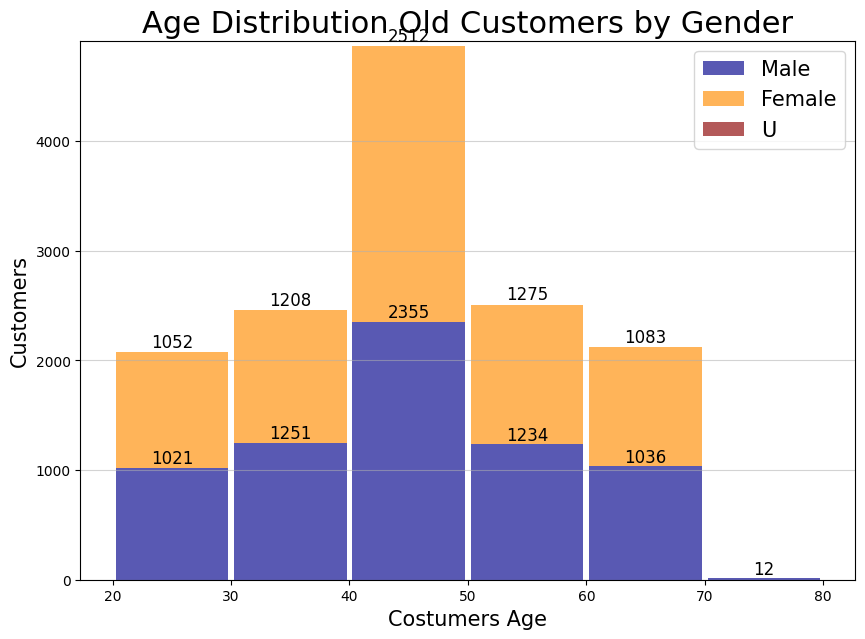

In [69]:
#### Ploting the age and gender

fig, ax = plt.subplots(figsize=(10,7))
age_male = final_df[final_df['gender']=='Male']['age']
age_female = final_df[final_df['gender']=='Female']['age']
age_u = final_df[final_df['gender']=='U']['age']
n, bins, patches = plt.hist(x = [age_male, age_female,age_u], 
                            stacked = True, bins=[20,30,40,50,60,70,80], 
                            color=['darkblue', 'darkorange', 'darkred'],
                            alpha=0.65, rwidth=0.95)
plt.grid(axis='y', alpha=0.55)
plt.xlabel('Costumers Age', fontsize = 15)
plt.ylabel('Customers', fontsize = 15)
plt.title('Age Distribution Old Customers by Gender', fontsize = 22)
plt.legend(['Male','Female', 'U'], fontsize = 15)

#### Labels on top of each bar indicating the number of customers
plt.ylim(top=n.max()+50)
prev_height = np.zeros(len(bins)-1)
for container in patches:
    for i, bar in enumerate(container):
        bin_x = bar.get_x() + bar.get_width() / 2
        bin_y = bar.get_height()
        if bar.get_height() > 0:
            if bar.get_height() < 30:
                offset = 5
            else:
                offset = 10
            if prev_height[i] > 0:
                bin_y += prev_height[i] + offset
            plt.text(bin_x, bin_y, int(bar.get_height()), ha='center', va='bottom', fontsize=12)
            prev_height[i] = bar.get_height()

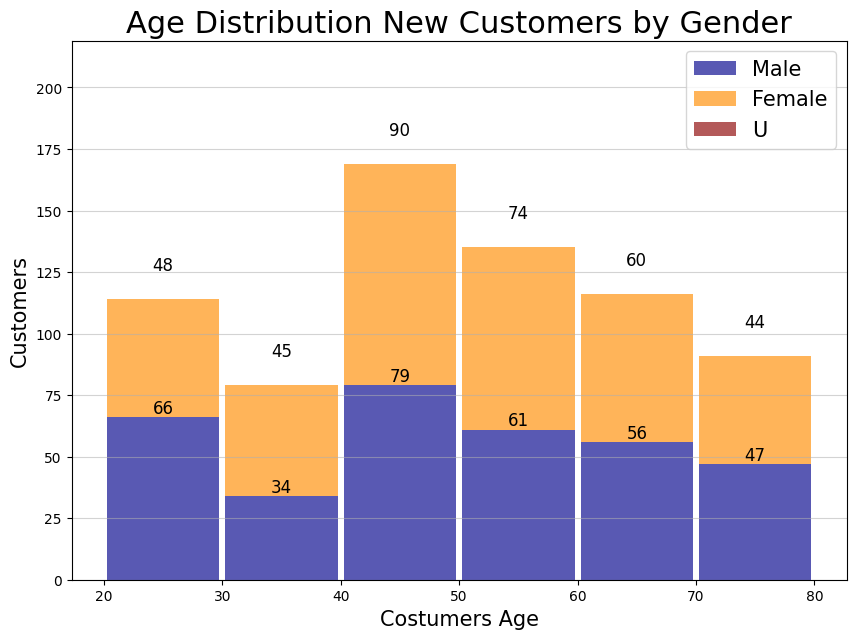

In [70]:
fig, ax = plt.subplots(figsize=(10,7))
age_male1 = newcustomerlist1[newcustomerlist1['gender']=='Male']['age']
age_female1 = newcustomerlist1[newcustomerlist1['gender']=='Female']['age']
age_u1 = newcustomerlist1[newcustomerlist1['gender']=='U']['age']

n, bins, patches = plt.hist(x = [age_male1, age_female1,age_u1], 
                            stacked = True, bins=[20,30,40,50,60,70,80], 
                            color=['darkblue', 'darkorange', 'darkred'],
                            alpha=0.65, rwidth=0.95)
plt.grid(axis='y', alpha=0.55)
plt.xlabel('Costumers Age', fontsize = 15)
plt.ylabel('Customers', fontsize = 15)
plt.title('Age Distribution New Customers by Gender', fontsize = 22)
plt.legend(['Male','Female', 'U'], fontsize = 15)

#### Labels on top of each bar indicating the number of customers
plt.ylim(top=n.max()+50)
prev_height = np.zeros(len(bins)-1)
for container in patches:
    for i, bar in enumerate(container):
        bin_x = bar.get_x() + bar.get_width() / 2
        bin_y = bar.get_height()
        if bar.get_height() > 0:
            if bar.get_height() < 30:
                offset = 5
            else:
                offset = 10
            if prev_height[i] > 0:
                bin_y += prev_height[i] + offset
            plt.text(bin_x, bin_y, int(bar.get_height()), ha='center', va='bottom', fontsize=12)
            prev_height[i] = bar.get_height()

Most Customers are between the age of 40-50. 
The lowest age groups are under 80 forOld Customers and under 40 for New 
customers.
The New customers in the age from 30-39 are showing steep drop. We have more Female customers then Male

In [72]:
#### new column for age category
final_df['age_category'] = pd.cut(final_df['age'], bins=[19, 30, 40, 50, 60, 70, 80, 90], 
                                  labels=['19-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])

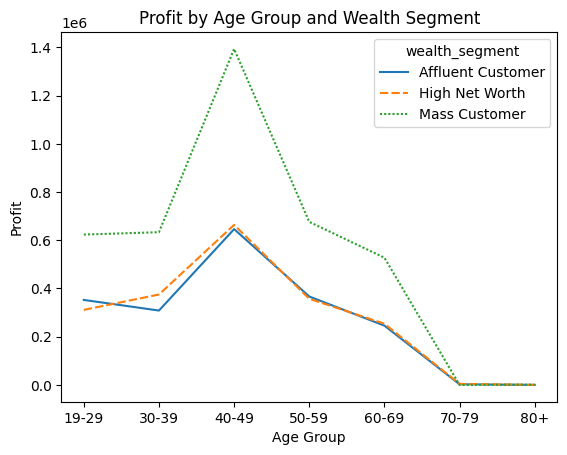

In [73]:
#### Create a pivot table of profit by age group and wealth segment
pivot_df = final_df.pivot_table(index='age_category', columns='wealth_segment', values='profit', aggfunc='sum')

#### Create the line plot
sns.lineplot(data=pivot_df)
plt.title('Profit by Age Group and Wealth Segment')
plt.xlabel('Age Group')
plt.ylabel('Profit')

plt.show()

Most profit generated from customers with age group of 41-49. Among the wealth segments, mass customers contributed the most in the profit.

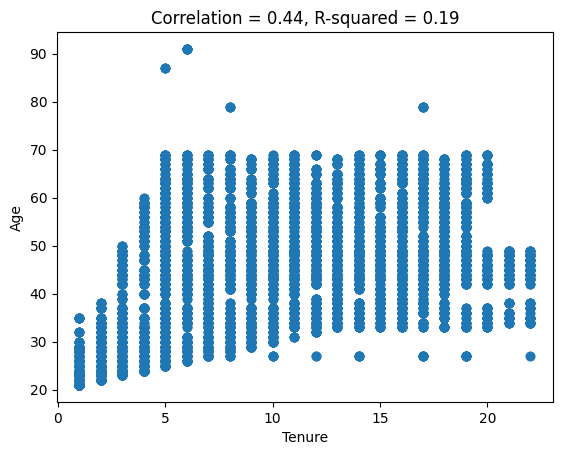

In [77]:
#### Calculate the correlation coefficient and R-squared
correlation = final_df[['tenure', 'age']].corr().iloc[0, 1]
r_squared = correlation**2

#### Plot the scatter plot
plt.scatter(final_df['tenure'], final_df['age'])
plt.xlabel('Tenure')
plt.ylabel('Age')
plt.title(f"Correlation = {correlation:.2f}, R-squared = {r_squared:.2f}")
plt.show()

A correlation of 0.44 indicates a moderate positive relationship between tenure and age. This means that as age increases, tenure tends to increase as well, but not necessarily at a strong rate.

An R² of 0.19 means that 19% of the variance in tenure can be explained by age. In other words, age is a moderate predictor of tenure, but there are other factors that also contribute to the variance in tenure.

Together, these values suggest that age is a moderately influential factor in determining tenure, but it is not the only factor

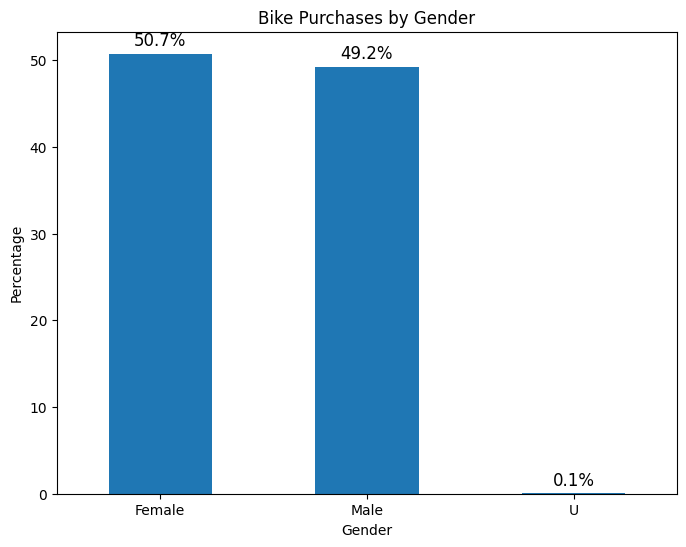

In [35]:
#### grouping by gender 
gender_counts = final_df.groupby('gender').size()
#### percentge of each gender
total_transactions = gender_counts.sum()
gender_percents = gender_counts / total_transactions * 100

#### plot as a bar chart
fig, ax = plt.subplots(figsize=(8, 6))
gender_percents.plot(kind='bar', ax=ax)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%', 
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
        
autolabel(ax.containers[0])


ax.set_title('Bike Purchases by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.set_xticklabels(gender_percents.index, rotation=0)

plt.show()

In [ ]:
Over the last three years about 51% of bike purchases were made by female to 47% were made by male and leas then 1% by unkonwn gender.
Females customers are majority of the bike related sales.

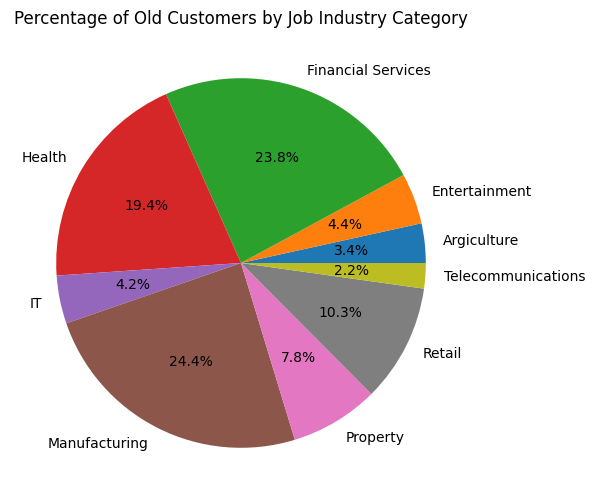

In [36]:
#### group customers by job industry category and count the number of customers in each category
job_counts = final_df.groupby('job_industry_category').size()

#### calculate the percentage of customers in each job industry category
total_customers = job_counts.sum()
job_percents = job_counts / total_customers * 100

#### plot as a pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(job_percents, labels=job_percents.index, autopct='%1.1f%%')
ax.set_title('Percentage of Old Customers by Job Industry Category')
plt.show()

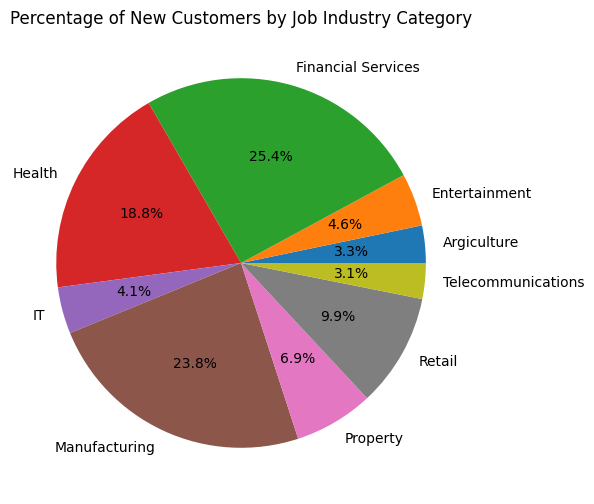

In [37]:
#### group customers by job industry category and count the number of customers in each category
job_counts1 = newcustomerlist1.groupby('job_industry_category').size()

#### calculate the percentage of customers in each job industry category
total_customers1 = job_counts1.sum()
job_percents1 = job_counts1 / total_customers1 * 100

#### plot as a pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(job_percents1, labels=job_percents1.index, autopct='%1.1f%%')
ax.set_title('Percentage of New Customers by Job Industry Category')
plt.show()

25% of The New Customers are in  Financial Servicer followed by Manufacturing. 24% of Old Customers are in 
Manufacturing followed with 23% in Financial Services. The smallest number of customers are in Agriculture and Telecommunication.

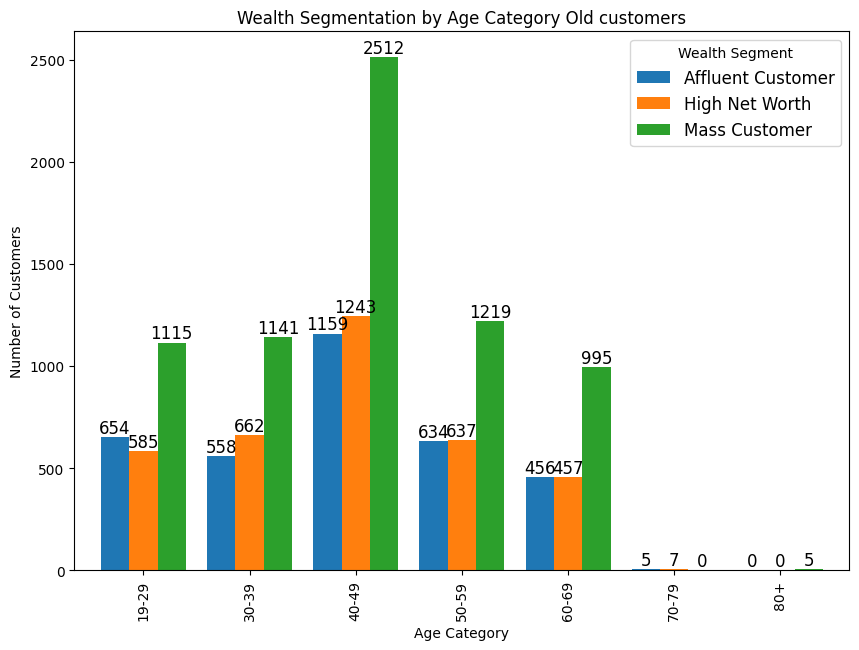

In [41]:
#### group the data by age category and wealth segmentation
age_wealth = final_df.groupby(['age_category', 'wealth_segment']).size().unstack(fill_value=0)

#### plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 7))

age_wealth.plot(kind='bar', ax=ax, width=0.8)

ax.set_title('Wealth Segmentation by Age Category Old customers')
ax.set_xlabel('Age Category')
ax.set_ylabel('Number of Customers')
ax.legend(title='Wealth Segment', fontsize=12)

#### add labels to each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

plt.show()


In [39]:
#### new column for age category
newcustomerlist1['age_category'] = pd.cut(newcustomerlist1['age'], bins=[19, 30, 40, 50, 60, 70, 80, 90], 
                                  labels=['19-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])

C:\Users\saram\AppData\Local\Temp\ipykernel_9028\4068186804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcustomerlist1['age_category'] = pd.cut(newcustomerlist1['age'], bins=[19, 30, 40, 50, 60, 70, 80, 90],


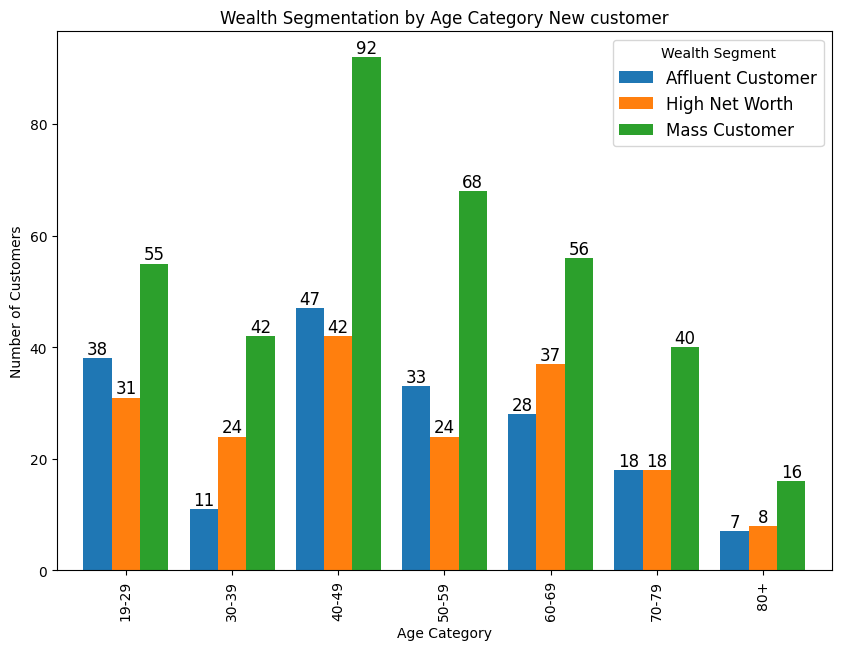

In [40]:
#### group the data by age category and wealth segmentation
age_wealth1 = newcustomerlist1.groupby(['age_category', 'wealth_segment']).size().unstack(fill_value=0)

#### plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 7))

age_wealth1.plot(kind='bar', ax=ax, width=0.8)

ax.set_title('Wealth Segmentation by Age Category New customer')
ax.set_xlabel('Age Category')
ax.set_ylabel('Number of Customers')
ax.legend(title='Wealth Segment', fontsize=12)

#### add labels to each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

plt.show()

In all age categories the largest number of customer are classified as Mass Customer.
Followed by High Net Worth Customers.

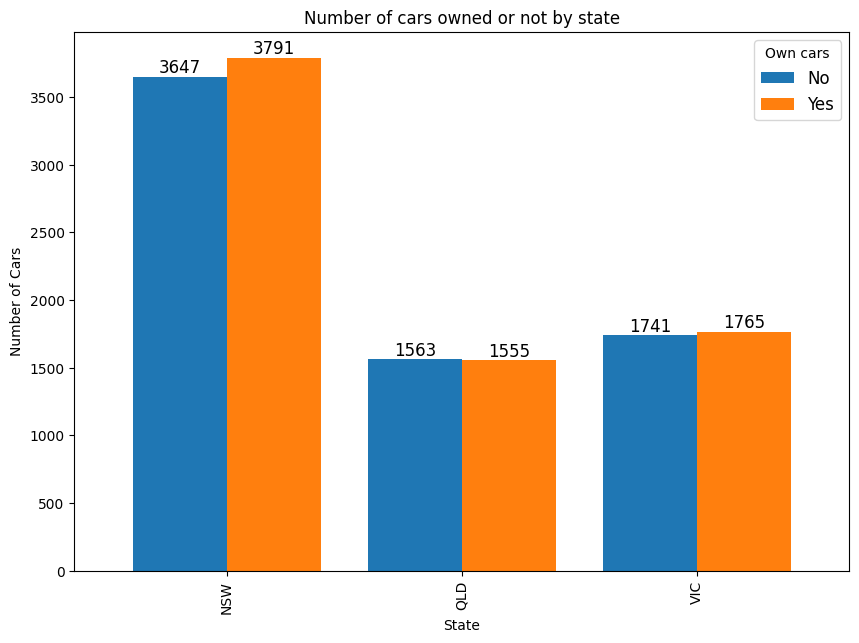

In [41]:
#### group the data by age category and wealth segmentation
cars_own = final_df.groupby(['state', 'owns_car']).size().unstack(fill_value=0)

#### plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 7))

cars_own.plot(kind='bar', ax=ax, width=0.8)

ax.set_title('Number of cars owned or not by state')
ax.set_xlabel('State')
ax.set_ylabel('Number of Cars')
ax.legend(title='Own cars', fontsize=12)

#### add labels to each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

plt.show()

NSW has the laargest number of customers that does own car by state. Follow by VIC and QLD has larger number of people that does not own cars

In [42]:
#### group the data by customer title and minimum values of M_score, R_score, and F_score
min_score = final_df.groupby('Costumer_title')[['M', 'R', 'F']].min()


print(min_score)

                        M  R  F
Costumer_title                 
Almost Losing Customer  1  2  1
Becoming Loyal          1  4  2
Evasive Customer        1  1  2
High Risk Customer      1  2  1
Late Bloomer            1  3  1
Losing Customer         1  3  1
Lost Customer           1  1  1
Platinum Customer       4  4  4
Potential Customer      1  3  2
Recent Customer         1  4  1
Very Loyal              2  4  3


In [43]:
min_score['M'] = pd.to_numeric(min_score['M'])
min_score['R'] = pd.to_numeric(min_score['R'])
min_score['F'] = pd.to_numeric(min_score['F'])



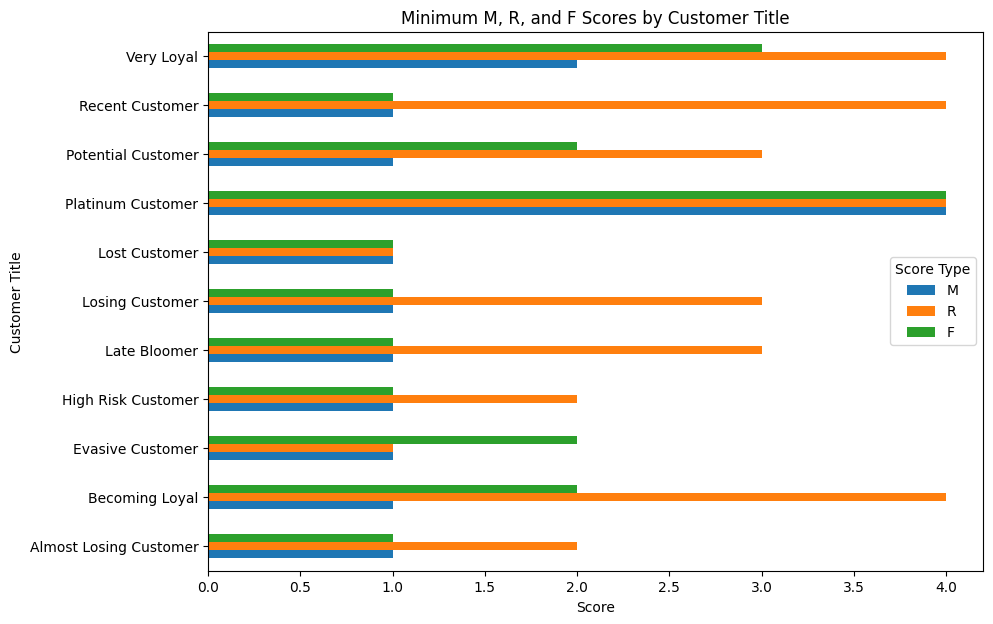

In [44]:

#### plot a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,7))

min_score.plot(kind='barh', ax=ax)

ax.set_title('Minimum M, R, and F Scores by Customer Title')
ax.set_xlabel('Score')
ax.set_ylabel('Customer Title')
ax.legend(title='Score Type')

plt.show()

RFM analysis is used to determine which customers a business should target to increase its revenue and values. The RFM model shows customers that have displayed high levels of engagement.


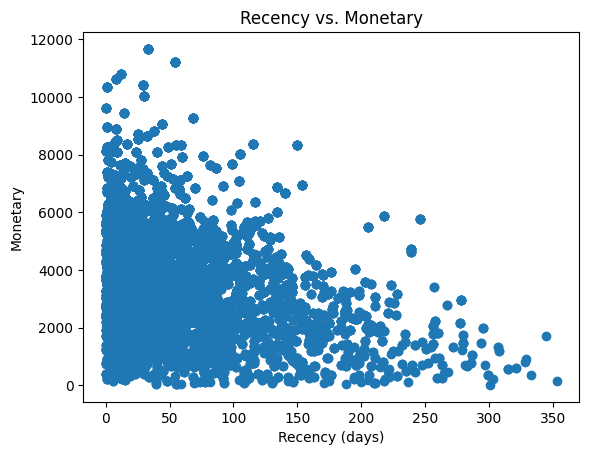

In [45]:
#### create scatter plot
plt.scatter(final_df['recency'], final_df['monetary'])


plt.xlabel('Recency (days)')
plt.ylabel('Monetary')
plt.title('Recency vs. Monetary')


plt.show()

The plot shows that customers who purchased more recently have generated more revenue, than the customers who visited a while ago. Customer in the last 50-100 days generate a moderate amount of revenue. The lowest revenue are from the customer that visited more than 200 days

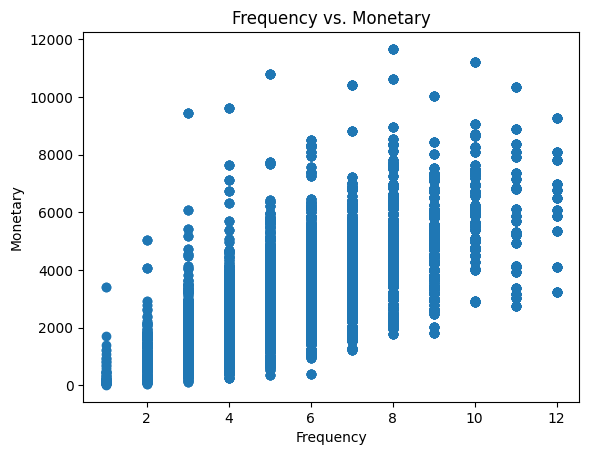

In [46]:
#### create scatter plot
plt.scatter(final_df['frequency'], final_df['monetary'])


plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs. Monetary')


plt.show()

There is a positive relationship between frequency and monetary gain from the business.

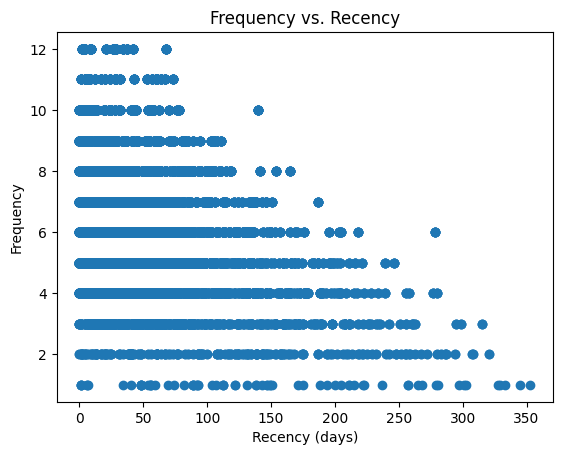

In [47]:
#### create scatter plot
plt.scatter(final_df['recency'], final_df['frequency'])


plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.title('Frequency vs. Recency')


plt.show()

Frequency of 0-2 correlated with high recency values. Customers that have visited more recently from 0-50 days have higher change of visiting more frequently. Higher frequency has a negative relationship with recency values. 

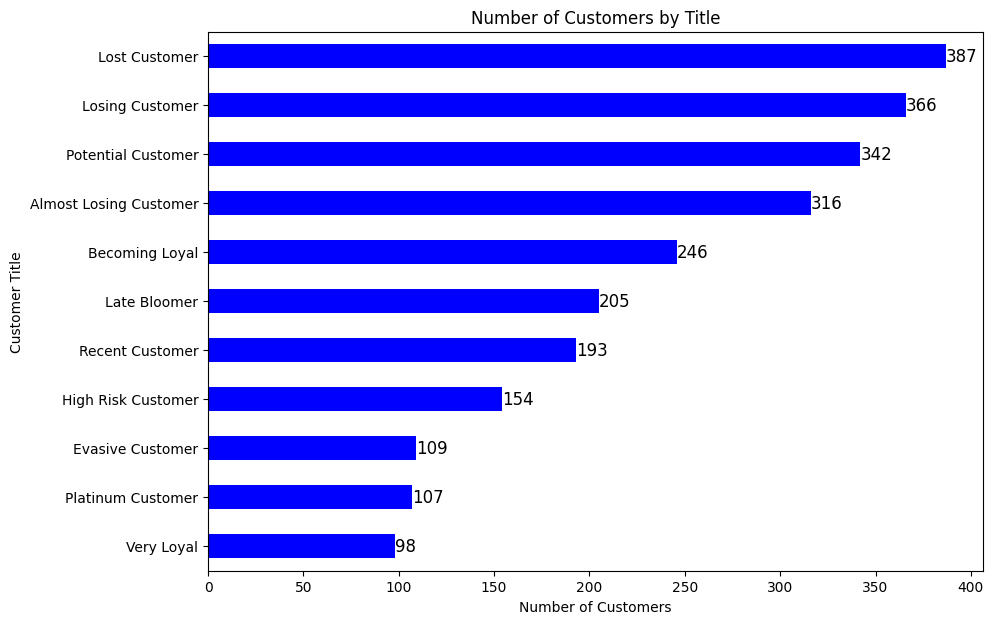

In [48]:
#### grouping the data by customer title and count the number of unique customers
customer_counts = final_df.groupby('Costumer_title')['customer_id'].nunique()

#### create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10,7))

customer_counts.sort_values().plot(kind='barh', ax=ax, color='blue')

ax.set_title('Number of Customers by Title')
ax.set_xlabel('Number of Customers')
ax.set_ylabel('Customer Title')

#### add labels to each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

plt.show()

C:\Users\saram\AppData\Local\Temp\ipykernel_9028\3708040233.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = final_df.groupby(['brand']).sum().reset_index()


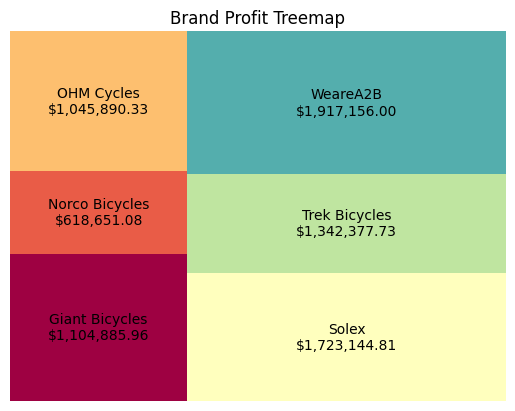

In [85]:
import squarify

#### Group by brand and sum profit
grouped_df = final_df.groupby(['brand']).sum().reset_index()

#### plot treemap
sizes = grouped_df['profit']
labels = [f"{grouped_df['brand'][i]}\n${sizes[i]:,.2f}" for i in range(len(grouped_df))]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
squarify.plot(sizes=sizes, label=labels, color=colors)

plt.title("Brand Profit Treemap")
plt.axis('off')

plt.show()

The brand that bring the most profit margin is WeareA2B, Solex and Trek Bicycles

C:\Users\saram\AppData\Local\Temp\ipykernel_9028\1512665010.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = final_df.groupby(['brand', 'month']).sum().reset_index()


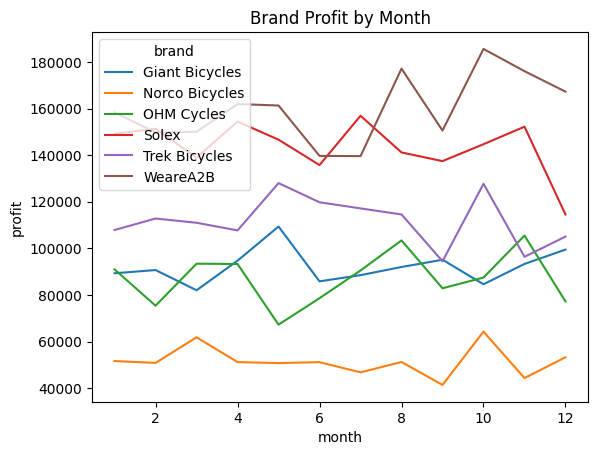

In [87]:
#### extract month from transaction_date
final_df['month'] = final_df['transaction_date'].dt.month

#### grou by brand and month, and sum of profit
grouped_df = final_df.groupby(['brand', 'month']).sum().reset_index()

#### plot
sns.lineplot(data=grouped_df, x='month', y='profit', hue='brand')
plt.title("Brand Profit by Month")

plt.show()
